In [36]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from prettytable import PrettyTable  # To print in tabular format

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer  # Scoring functions
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score  # Scoring fns

In [37]:
def false_alarm_rate(y_true, y_pred):
    """
    This function will return False Alarm Rate for given true and predicted values.
    False Alarm Rate is average of False Negetive Rate and False Positive Rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate

def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):
    """ 
    Utility function to get result on test data from best found classifier using hyper parameter tuning.
    Print the accuracy and False Alarm Rate for both train and test.
    Plot confusion matrix of train and test.
    """
    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']
    
    # Training te best model
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)  # prediction on train data
    y_test_pred = clf.predict(x_test)  # prediction on test data
    
    # auc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # Scores of train dataset
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)
    
    # Scores of test dataset
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)
    
    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)

    # Plot AUC curve
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Confusion martix of train and test
    # Train confusion matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")

    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()
    
    # Returning scores of test data
    return clf, test_auc, test_f1, test_far

In [3]:
cd ..

c:\Users\user\T5\PROJECT\Classification


In [5]:
df = pd.read_csv('data/colab.csv')

In [4]:
X = pd.read_csv('data/pre-processed-x_train-data.csv')
y = pd.read_csv('data/pre-processed-y_train-data.csv')
df = X.join(y)
train= df.copy(deep=True)

In [5]:
del df, X, y
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
del train

In [6]:

X_train, X_test, y_train, X_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
from sklearn import linear_model, neighbors, ensemble

In [11]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=29, n_jobs=-1)
lr_model = LogisticRegression(C=100, solver='newton-cg')
dt_model = DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=4,
                       min_impurity_decrease=0, min_weight_fraction_leaf=0)
rf_model = RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=5,
                       min_samples_split=12)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1)
models = ["lr_model", "knn_model", "rf_model", "et_model"]

In [12]:
import pickle

In [17]:
cd ml

c:\Users\user\T5\PROJECT\classification\workspace\ml


In [18]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train, y_train)
    
    with open(f"models/{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

In [10]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!

sns.set_style("whitegrid")

In [18]:
pwd

'c:\\Users\\user\\T5\\PROJECT\\Classification\\workspace'

In [4]:
df = pd.read_csv('data/colab.csv')
df = df.iloc[:,1:]

In [22]:
cd data

c:\Users\user\T5\PROJECT\classification\data


In [23]:
X = pd.read_csv('pre-processed-x_train-data.csv')
y = pd.read_csv('pre-processed-y_train-data.csv')
df = X.join(y)
train= df.copy(deep=True)

In [30]:
train

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no,label
0,-0.191029,-0.104456,-0.135769,-0.049134,-0.102726,-0.576371,0.703839,1.578100,-0.389897,-0.273700,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.109485,-0.046014,0.172599,-0.046410,0.188544,-0.576345,-1.141901,1.560002,-0.389928,-0.069233,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.040699,-0.089845,-0.026933,-0.048527,-0.012133,-0.576734,-1.141901,1.560002,-0.389964,-0.252044,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.049729,-0.060624,-0.063212,-0.047016,-0.098563,-0.576737,-1.141901,1.560002,-0.389958,-0.275821,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.140417,-0.075235,-0.117630,-0.047554,-0.102057,-0.576617,0.723268,1.560002,-0.389927,-0.275561,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,-0.209773,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,0.723268,-0.720406,-0.120980,-0.277208,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
175337,-0.131728,-0.075235,-0.099490,-0.047062,-0.101459,-0.576616,0.723268,1.560002,-0.389926,-0.275183,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
175338,-0.209773,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,0.723268,-0.720406,-0.120980,-0.277208,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
175339,-0.209773,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,0.723268,-0.720406,-0.120980,-0.277208,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), 
                                                    df.label, 
                                                    random_state=42
                                                   )

In [28]:
cd ml

c:\Users\user\T5\PROJECT\classification\workspace\ml


In [29]:
# Load pre-trained/tuned models

model_names = ["lr_model", "knn_model", "rf_model", "et_model"]

for model_name in model_names:
    with open(f"models/{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [30]:
model_list

[('lr_model', LogisticRegression(C=100, solver='newton-cg')),
 ('knn_model', KNeighborsClassifier(n_jobs=-1, n_neighbors=29)),
 ('rf_model',
  RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=5,
                         min_samples_split=12)),
 ('et_model', ExtraTreesClassifier(random_state=1))]

In [31]:
# Quick peek at each model performance

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_model score: 0.9341637010676157
knn_model score: 0.9373574231225477
rf_model score: 0.9386349119445205
et_model score: 0.9536910302034857


In [38]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
# voting_classifer.fit(X_train, y_train)

In [33]:
from sklearn.metrics import auc, f1_score, precision_score, recall_score

y_predict = voting_classifer.predict(X_test)
print("The score for voting classifier is")
print("Training: {:6.2f}%".format(100*voting_classifer.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*voting_classifer.score(X_test, y_test)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print('F1 : {:6.4f}'.format(f1_score(y_test, y_predict)))

The score for voting classifier is
Training:  95.71%
Test set:  94.43%
Precision: 0.9307,   Recall: 0.9920
F1 : 0.9604


+---------+----------+--------------------+--------------------+---------------------+
| Dataset |  Model   |        AUC         |      F1-score      |   False Alarm Rate  |
+---------+----------+--------------------+--------------------+---------------------+
|  Train  | et_model | 0.935836771074305  | 0.969757614979253  | 0.06416322892569508 |
|   Test  | et_model | 0.9176860757813567 | 0.9605617358025492 | 0.08231392421864318 |
+---------+----------+--------------------+--------------------+---------------------+


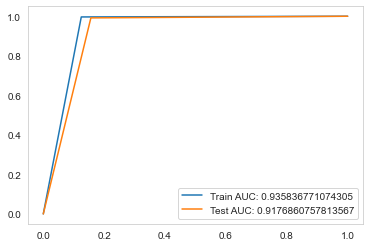

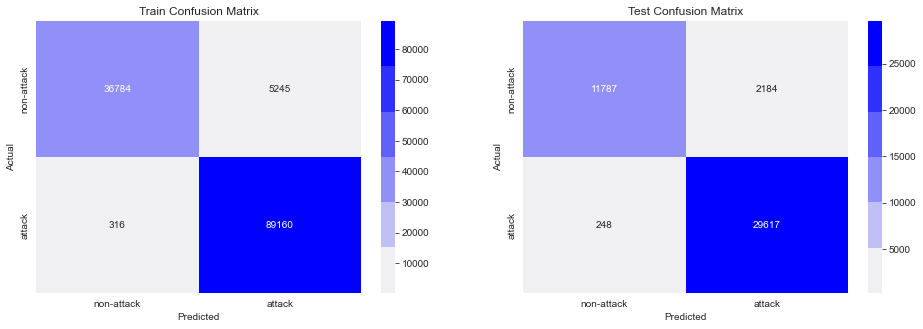

(VotingClassifier(estimators=[('lr_model',
                               LogisticRegression(C=100, solver='newton-cg')),
                              ('knn_model',
                               KNeighborsClassifier(n_jobs=-1, n_neighbors=29)),
                              ('rf_model',
                               RandomForestClassifier(max_depth=90,
                                                      max_features=2,
                                                      min_samples_leaf=5,
                                                      min_samples_split=12)),
                              ('et_model',
                               ExtraTreesClassifier(random_state=1))],
                  n_jobs=-1),
 0.9176860757813567,
 0.9605617358025492,
 0.08231392421864318)

In [39]:
evaluate_result(voting_classifer, X_train, y_train, X_test, y_test, model_name)

The score for voting classifier is
Training:  99.94%
Test set:  94.27%
Precision: 0.9398,   Recall: 0.9781
F1 : 0.9586

In [34]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model',
                              LogisticRegression(C=100, solver='newton-cg')),
                             ('knn_model',
                              KNeighborsClassifier(n_jobs=-1, n_neighbors=29)),
                             ('rf_model',
                              RandomForestClassifier(max_depth=90,
                                                     max_features=2,
                                                     min_samples_leaf=5,
                                                     min_samples_split=12)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=1))],
                 n_jobs=-1, voting='soft')

In [35]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_classifer.predict(X_test)
# accuracy_score(y_test, y_pred)
print("The score for voting classifier is")
print("Training: {:6.2f}%".format(100*voting_classifer.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*voting_classifer.score(X_test, y_test)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print('F1 : {:6.4f}'.format(f1_score(y_test, y_predict)))

The score for voting classifier is
Training:  97.70%
Test set:  94.43%
Precision: 0.9307,   Recall: 0.9920
F1 : 0.9604


In [27]:
# create voting classifier
weights = [1,1,2.2,4.2]
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model',
                              LogisticRegression(C=100, random_state=1,
                                                 solver='liblinear')),
                             ('knn_model',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=26,
                                                   weights='distance')),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=1))],
                 n_jobs=-1, voting='soft', weights=[1, 1, 2.2, 4.2])

In [28]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_model.predict(X_test)
# accuracy_score(y_test, y_pred)
print("The score for voting classifier is")
print("Training: {:6.2f}%".format(100*voting_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*voting_model.score(X_test, y_test)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print('F1 : {:6.4f}'.format(f1_score(y_test, y_predict)))

0.9441149635036497

In [29]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [30]:
stacked.fit(X_train, y_train)

StackingClassifier(classifiers=[LogisticRegression(C=100, random_state=1,
                                                   solver='liblinear'),
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=26,
                                                     weights='distance'),
                                RandomForestClassifier(random_state=1),
                                ExtraTreesClassifier(random_state=1)],
                   meta_classifier=LogisticRegression())

In [31]:
y_pred = stacked.predict(X_test)
# accuracy_score(y_test, y_pred)
print("The score for voting classifier is")
print("Training: {:6.2f}%".format(100*stacked.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*stacked.score(X_test, y_test)))
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print('F1 : {:6.4f}'.format(f1_score(y_test, y_predict)))

0.9420620437956204

In [ ]:
et= ExtraTreesClassifier()